### Assignment 2: Points to map 

 Plot a map of points, based on a set of longitude and latitude coordinates that are stored in a csv file.

The input data is stored in the CSV spreadsheet ***'sweden_points.csv'*** which you can download from the exercise folder. Add it your working directory and import it.  The coordinates stored there are in WGS84 format (decimal degrees, EPSG:4326) and it contains 2000 locations and 3 columns (latitude, longtitde and ID).

First import the csv file as a pandas dataframe.

In [1]:
import pathlib

DATA_DIRECTORY = pathlib.Path().resolve() / "Exercises" / "Exercise 2"

In [2]:
# RUN YOUR CODE HERE
import pandas as pd

df_sweden_points = pd.read_csv(DATA_DIRECTORY / 'sweden_points.csv')

1) Add a geometry column and fill it with geometries.
Create an empty column called ***geometry*** where you will store shapely Point objects.
Insert Point objects into the column geometry based on the coordinate columns.
You want to create a shapely.geometry.Point for each row, based on the columns longitude and latitude

In [3]:
# RUN YOUR CODE HERE
from shapely.geometry import Point
# Create an empty column called 'geometry'
df_sweden_points['geometry'] = None

# Iterate over each row in the DataFrame and insert a Point object into the 'geometry' column
for idx, row in df_sweden_points.iterrows():
    point = Point(row['lon'], row['lat'])
    df_sweden_points.at[idx, 'geometry'] = point

# Print the first few rows of the DataFrame to verify that the 'geometry' column was added correctly
df_sweden_points.head()

,lat,lon,trip_id,geometry
0,59.751286,21.149547,1,POINT (21.14954727276289 59.75128564941775)
1,65.258818,21.154727,1,POINT (21.15472668615925 65.25881798502805)
2,61.744069,21.413240,1,POINT (21.413240388392545 61.74406920192757)
3,58.834489,23.026573,1,POINT (23.026572762151275 58.83448938216252)
4,61.308422,17.221379,1,POINT (17.221379411521763 61.3084223226109)


2) Convert the pandas.DataFrame into a geopandas.GeoDataFrame 

In [4]:
# RUN YOUR CODE HERE
import geopandas as gpd

# Convert the Pandas DataFrame to a GeoPandas DataFrame
# gdf_sweden_points = gpd.GeoDataFrame(df_sweden_points, geometry='geometry')
gdf_sweden_points = gpd.GeoDataFrame(df_sweden_points)
gdf_sweden_points.set_crs(epsg=4326, inplace=True)

# Print the first few rows of the GeoPandas DataFrame to verify that it was created correctly
gdf_sweden_points.head()

,lat,lon,trip_id,geometry
0,59.751286,21.149547,1,POINT (21.14955 59.75129)
1,65.258818,21.154727,1,POINT (21.15473 65.25882)
2,61.744069,21.413240,1,POINT (21.41324 61.74407)
3,58.834489,23.026573,1,POINT (23.02657 58.83449)
4,61.308422,17.221379,1,POINT (17.22138 61.30842)


 3) Save the data in Shapefile format as sweden_points.shp inside the data directory

In [5]:
# RUN YOUR CODE HERE
gdf_sweden_points.to_file(DATA_DIRECTORY / 'sweden_points.shp', driver='ESRI Shapefile')

4. Simply plot your points with geodataframe.plot() https://geopandas.org/en/stable/docs/user_guide/mapping.html 

<Axes: >

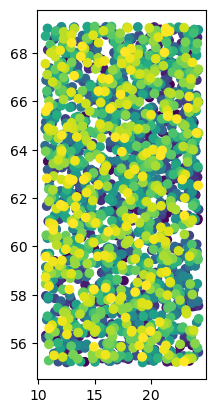

In [6]:
gdf_sweden_points.plot(column="trip_id")